<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/Well_Test_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pressure Drawdown Testing with Python

Author : Divyanshu Vyas (PE | RE | Machine Learning/Deep Learning)
Email : dvyas13ad@gmail.com

##Problem Statement :

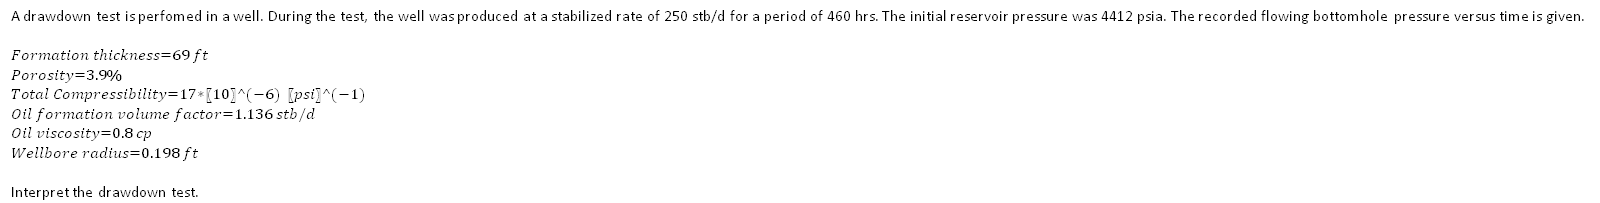

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#Input Data 

q = 250 #stb/d

tp = 460 #hrs

Pi = 4412 #psia

h = 69 #ft

phi = 3.9/100

ct = 17E-6 #psi-1

B = 1.136 #rb/stb

mu = 0.8 #cp

rw = 0.198 #ft



In [12]:
#Pwf v/s t

df = pd.read_excel('WTA.xlsx')

In [14]:
df['delP'] = Pi - df['Pwf']

In [49]:
t = np.array(df['t'])

dt = []
for i in range(len(t)):

  if i==0:
    dt.append(t[i])
  else:
    dt.append(t[i] - t[i-1])

dt = np.array(dt)


In [51]:
df['dt'] = dt

In [56]:
p = np.array(df['delP'])

dp = []
for j in range(len(p)):

  if j==0:
    dp.append(p[j])
  else:
    dp.append(p[j] - p[j-1])

dp = np.array(dp)


In [57]:
df['dP'] = dp

In [59]:
df.head()

,t,Pwf,delP,dt,dP
0,0.00,4412,0,0.00,0
1,1.60,3812,600,1.60,600
2,1.94,3699,713,0.34,113
3,2.79,3653,759,0.85,46
4,4.01,3636,776,1.22,17


In [61]:
P_dash = (df['t'][1:])*(df['dP'][1:])/df['dt'][1:]

In [68]:
P_dash

P_del = df['delP'][1:]

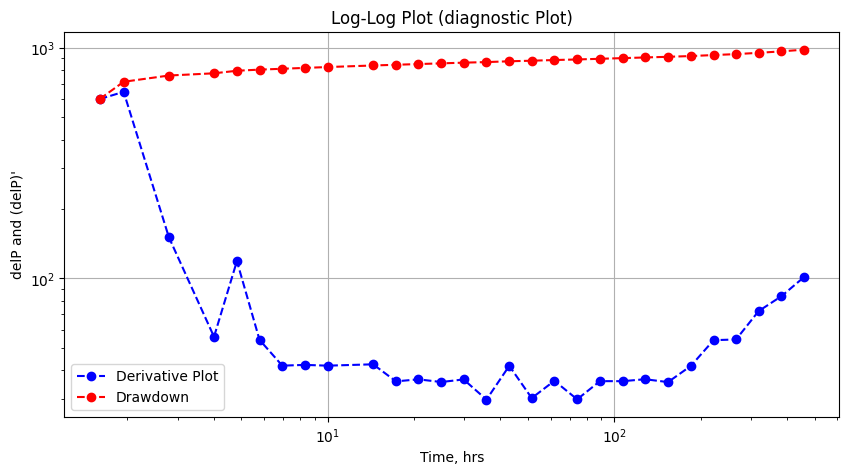

In [72]:
plt.style.use('default')

plt.figure(figsize=(10,5))

plt.loglog(df['t'][1:], P_dash,linestyle='--', marker='o', color='b',label='Derivative Plot')

plt.loglog(df['t'][1:], P_del,linestyle='--', marker='o', color='r',label='Drawdown')

plt.title('Log-Log Plot (diagnostic Plot)')

plt.xlabel('Time, hrs')
plt.ylabel("delP and (delP)'")

plt.legend(loc='best')
plt.grid()

In [73]:
#We can clearly see that the IARF Exists for roughly around t=10 to t = 100 hours

In [74]:
df_IARF = df[(df['t']>=10) & (df['t']<=100)]

In [75]:
df_IARF

,t,Pwf,delP,dt,dP
10,14.4,3573,839,4.41,13
11,17.3,3567,845,2.90,6
12,20.7,3561,851,3.40,6
13,24.9,3555,857,4.20,6
14,29.8,3549,863,4.90,6
15,35.8,3544,868,6.00,5
16,43.0,3537,875,7.20,7
17,51.5,3532,880,8.50,5
18,61.8,3526,886,10.30,6
19,74.2,3521,891,12.40,5


In [77]:
#Lets Plot a Semilog Plot for this data now. 


df_IARF['logt'] = np.log10(df_IARF['t'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [78]:
df_IARF

,t,Pwf,delP,dt,dP,logt
10,14.4,3573,839,4.41,13,1.158362
11,17.3,3567,845,2.90,6,1.238046
12,20.7,3561,851,3.40,6,1.315970
13,24.9,3555,857,4.20,6,1.396199
14,29.8,3549,863,4.90,6,1.474216
15,35.8,3544,868,6.00,5,1.553883
16,43.0,3537,875,7.20,7,1.633468
17,51.5,3532,880,8.50,5,1.711807
18,61.8,3526,886,10.30,6,1.790988
19,74.2,3521,891,12.40,5,1.870404


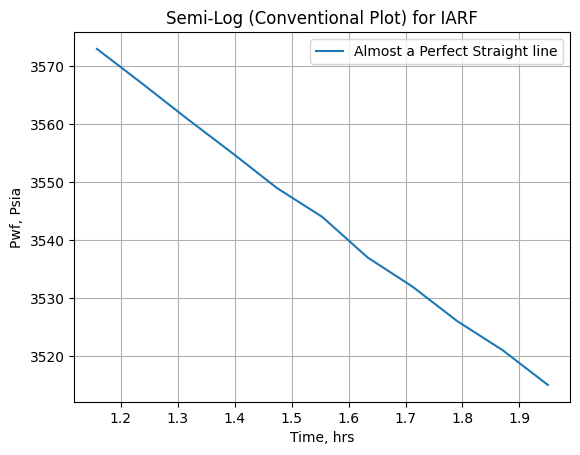

In [82]:
plt.plot(df_IARF['logt'],df_IARF['Pwf'],label='Almost a Perfect Straight line')

plt.title('Semi-Log (Conventional Plot) for IARF')

plt.xlabel('Time, hrs')
plt.ylabel("Pwf, Psia")

plt.legend(loc='best')
plt.grid()



In [83]:
# The slope of this straight line is - m = -162.6*q*mu*B/K/h hence we can find the Permeability. 

coeffs = np.polyfit(df_IARF['logt'],df_IARF['Pwf'],1)

In [89]:
m = coeffs[0]

In [92]:
k = abs(162.6*q*mu*B/m/h)

In [93]:
#Conclusion

print(f'--> Hence the Natural Absolute Permeability of the reservoir is: {k} mD.')

--> Hence the Natural Absolute Permeability of the reservoir is: 7.314556876770051 mD.
